In [ ]:
import fitsio
import numpy as np
import pylab as pl

from astropy.table import Table
from gold_footprint import gold_footprint
from astropy.coordinates import SkyCoord
from astropy import units as u
from selection.tomog import tomog
from selection.bx import bx

In [2]:
tmg = Table.read('/global/cscratch1/sd/mjwilson/DESILBG/GOLD/TMGV9/tmg_v9.fits')
tmg.pprint()

   ID           RA                DEC         MASK ... H_err  Ks_err Z_BC03 IDX
------- ------------------ ------------------ ---- ... ------ ------ ------ ---
2701593 150.61330155313811 1.2814882473135494    0 ... 1000.0 1000.0 2.4626 -99
1289080 151.24121601922798 3.1684822801157484    0 ... 1000.0 1000.0 3.0897 -99
 187353 149.21004001927372 3.1048311728256377    0 ... 1000.0 1000.0 2.6679 -99
4850199 149.61243459416568  2.873956889833254    0 ...  -99.0  -99.0 0.1384 -99
2919769 149.25140478616885 1.6349077897107656    0 ... 1000.0  -99.0 2.3008 -99
2587844 150.81978916811246  1.037446131173854    0 ... 1000.0 1000.0 2.7165 -99
2721046 150.55870751605624 1.4665748703386872    0 ... 1000.0 1000.0 0.0752 -99
 709518 150.47909771682362  2.989020677783287    0 ... 1000.0 1000.0 3.1789 -99
 100735 149.37250768438415  3.080247775303863    0 ... 1000.0 1000.0 3.7247 -99
2439584 151.05095140422483 1.3016694434432885    0 ... 1000.0 1000.0  2.168 -99
    ...                ...              

In [3]:
yeche = Table.read('/global/u2/y/yeche/LBG/LBG_targets_in_COSMOS.fits')

In [4]:
yeche.pprint()

        RA                DEC         PMRA PMDEC ... g_err   r    r_err photo_z
------------------ ------------------ ---- ----- ... ----- ------ ----- -------
149.49003311510504  2.886386126934052  0.0   0.0 ... 0.025 24.364 0.024  2.6515
149.49897946837575 2.8957199805301594  0.0   0.0 ... 0.021 24.329 0.024  2.8696
149.51497696711988  2.898329474252068  0.0   0.0 ... 0.014 23.737 0.016  0.0975
149.49949379331122 2.8968090596402205  0.0   0.0 ...  0.03 23.025 0.027  2.9111
 149.5711060029605  2.905573044289271  0.0   0.0 ... 0.082 23.898 0.073  2.6466
 149.5814422678106  2.905606383321363  0.0   0.0 ... 0.058 24.306 0.069  2.6091
149.57960196493113 2.9055795730613654  0.0   0.0 ... 0.066 23.845 0.083  3.1752
149.58499252303005  2.905580018805254  0.0   0.0 ... 0.059 24.348 0.078  2.6343
 149.5768199404382  2.905598518583442  0.0   0.0 ... 0.056 23.784 0.056  3.1246
149.50309811178028 2.9108575586615792  0.0   0.0 ... 0.013 23.897 0.016   2.769
               ...                ...  .

In [80]:
bxu = Table.read('/global/cscratch1/sd/mjwilson/DESILBG/GOLD/BXU/bxu.fits')

In [5]:
yeche.dtype.names

('RA',
 'DEC',
 'PMRA',
 'PMDEC',
 'REF_EPOCH',
 'OVERRIDE',
 'u',
 'u_err',
 'g',
 'g_err',
 'r',
 'r_err',
 'photo_z')

In [6]:
assert np.all(yeche['REF_EPOCH'] == 0.0)
assert np.all(yeche['PMRA'] == 0.0)
assert np.all(yeche['PMDEC'] == 0.0)

In [ ]:
clauds = fitsio.read('/global/cscratch1/sd/mjwilson/clauds/March2021/COSMOS_v9_v210225.fits')

# Adam says to set this to True

In [7]:
assert np.all(yeche['OVERRIDE'] == False)

In [8]:
in_goldfootprint = gold_footprint(yeche)

In [9]:
np.count_nonzero(in_goldfootprint)

8846

Text(0, 0.5, 'DEC')

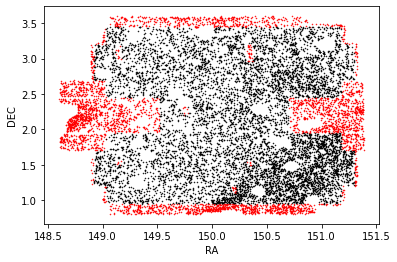

In [10]:
pl.plot(yeche['RA'][~in_goldfootprint], yeche['DEC'][~in_goldfootprint], marker='.', lw=0.0, markersize=1, c='r')
pl.plot(yeche['RA'][in_goldfootprint], yeche['DEC'][in_goldfootprint], marker='.', lw=0.0, markersize=1, c='k')

pl.xlabel('RA')
pl.ylabel('DEC')

# Limit to within the gold footprint.

In [11]:
gold_yeche = yeche[in_goldfootprint]

In [12]:
assert len(gold_yeche) == 8846

In [13]:
sc_gold_yeche = SkyCoord(ra=gold_yeche['RA']*u.degree, dec=gold_yeche['DEC']*u.degree)
sc_tmg        = SkyCoord(ra=tmg['RA']*u.degree, dec=tmg['DEC']*u.degree)

# TMG is the larger catalog
idx, d2d, d3d = sc_gold_yeche.match_to_catalog_sky(sc_tmg)

In [14]:
matched = gold_yeche[d2d.arcsecond < 1.0]

# Fraction of yeche catalog in footprint that is matched. 

In [15]:
100. * len(matched) / len(gold_yeche)

85.74496947773005

In [16]:
matched.sort('RA')

In [17]:
matched_tmg = Table(tmg[idx][d2d.arcsecond < 1.0], copy=True)

In [18]:
matched_tmg.sort('RA')

In [19]:
matched

RA,DEC,PMRA,PMDEC,REF_EPOCH,OVERRIDE,u,u_err,g,g_err,r,r_err,photo_z
float64,float64,float64,float64,float64,bool,float64,float64,float64,float64,float64,float64,float64
148.9200722757402,2.9685136819814755,0.0,0.0,0.0,False,26.388,0.09,24.61,0.024,24.071,0.018,2.9332
148.9208689872771,2.708677461383682,0.0,0.0,0.0,False,27.093,0.662,24.923,0.062,24.324,0.046,3.0999
148.92127014227444,1.2570191348137032,0.0,0.0,0.0,False,26.397,0.09,24.369,0.023,23.807,0.017,2.9693
148.92270654601782,2.799023197178508,0.0,0.0,0.0,False,24.101,0.034,23.344,0.028,23.386,0.08,1.8986
148.92286793099012,2.7417897255411505,0.0,0.0,0.0,False,27.162,0.267,25.11,0.055,24.359,0.036,2.9583
148.9230025330549,2.965771717241044,0.0,0.0,0.0,False,25.797,0.076,24.429,0.03,23.994,0.025,2.7992
148.92334292844242,1.245521970031794,0.0,0.0,0.0,False,27.867,0.346,25.031,0.038,24.165,0.022,3.1731
148.92360510393664,3.0166882159511923,0.0,0.0,0.0,False,25.227,0.065,23.92,0.034,23.949,0.049,2.3526
148.9245201710496,2.77305755925787,0.0,0.0,0.0,False,27.061,0.22,24.929,0.043,24.421,0.035,2.9667


In [20]:
matched_tmg

ID,RA,DEC,MASK,FLAG_FIELD,FLAG_FIELD_BINARY [7],EB_V,u,uS,g,r,i,z,y,Yv,J,H,Ks,u_err,uS_err,g_err,r_err,i_err,z_err,y_err,Yv_err,J_err,H_err,Ks_err,Z_BC03,IDX
int64,float64,float64,int16,int16,bool,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64
260119,148.9200722757402,2.9685136819814755,0,3,True .. False,0.020133005558671792,26.388,-99.094,24.61,24.071,23.983,23.964,23.959,-99.024,-99.018,-99.011,-99.007,0.09,1000.0,0.024,0.018,0.023,0.035,0.083,1000.0,1000.0,1000.0,1000.0,2.9332,-99
3286599,148.9208689872771,2.708677461383682,0,3,True .. False,0.027608318065230383,27.093,-99.129,24.923,24.324,24.173,24.266,24.192,-99.033,-99.024,-99.016,-99.01,0.662,-99.0,0.062,0.046,0.054,0.087,0.208,1000.0,1000.0,1000.0,1000.0,3.0999,-99
1403951,148.92127014227444,1.2570191348137032,0,3,True .. False,0.02128436302864014,26.397,-99.099,24.369,23.807,23.697,23.542,23.58,-99.026,-99.019,-99.012,-99.008,0.09,1000.0,0.023,0.017,0.02,0.027,0.067,1000.0,1000.0,1000.0,1000.0,2.9693,-99
3296028,148.92270654601782,2.799023197178508,0,3,True .. False,0.025178158513045685,24.101,-99.118,23.344,23.386,22.464,22.07,22.104,-99.03,-99.022,-99.014,-99.009,0.034,-99.0,0.028,0.08,0.047,0.032,0.075,1000.0,1000.0,1000.0,1000.0,1.8986,-99
3290056,148.92286793099012,2.7417897255411505,0,3,True .. False,0.026817884997812142,27.162,-99.125,25.11,24.359,24.362,24.248,24.1,-99.032,-99.023,-99.015,-99.01,0.267,-99.0,0.055,0.036,0.047,0.062,0.129,1000.0,1000.0,1000.0,1000.0,2.9583,-99
259850,148.9230025330549,2.965771717241044,0,3,True .. False,0.020191725230625977,25.797,-99.094,24.429,23.994,23.941,23.818,23.95,-99.024,-99.018,-99.011,-99.007,0.076,1000.0,0.03,0.025,0.033,0.045,0.117,1000.0,1000.0,1000.0,1000.0,2.7992,-99
1402909,148.92334292844242,1.245521970031794,0,3,True .. False,0.021465795034579276,27.867,-99.1,25.031,24.165,23.903,23.886,23.949,-99.026,-99.019,-99.012,-99.008,0.346,1000.0,0.038,0.022,0.023,0.034,0.088,1000.0,1000.0,1000.0,1000.0,3.1731,-99
267147,148.92360510393664,3.0166882159511923,0,3,True .. False,0.019365654289161045,25.227,-99.09,23.92,23.949,23.617,23.356,23.116,-99.023,-99.017,-99.011,-99.007,0.065,1000.0,0.034,0.049,0.052,0.056,0.103,1000.0,1000.0,1000.0,1000.0,2.3526,-99
3293563,148.9245201710496,2.77305755925787,0,3,True .. False,0.025841283957178537,27.061,-99.121,24.929,24.421,24.314,24.108,24.191,-99.031,-99.023,-99.015,-99.009,0.22,-99.0,0.043,0.035,0.042,0.051,0.136,1000.0,1000.0,1000.0,1000.0,2.9667,-99


In [21]:
np.mean(matched['RA'] == matched_tmg['RA'])

0.9998681608437706

In [22]:
np.mean(matched['DEC'] == matched_tmg['DEC'])

0.9998681608437706

In [23]:
spurious = (matched['RA'] != matched_tmg['RA'])

In [24]:
matched[spurious]

RA,DEC,PMRA,PMDEC,REF_EPOCH,OVERRIDE,u,u_err,g,g_err,r,r_err,photo_z
float64,float64,float64,float64,float64,bool,float64,float64,float64,float64,float64,float64,float64
151.01470471813647,1.6333125661987211,0.0,0.0,0.0,False,25.122,0.095,24.428,0.062,24.278,0.089,2.2627


In [25]:
matched_tmg[spurious]

ID,RA,DEC,MASK,FLAG_FIELD,FLAG_FIELD_BINARY [7],EB_V,u,uS,g,r,i,z,y,Yv,J,H,Ks,u_err,uS_err,g_err,r_err,i_err,z_err,y_err,Yv_err,J_err,H_err,Ks_err,Z_BC03,IDX
int64,float64,float64,int16,int16,bool,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64
3488840,151.0147419137485,1.6331543609904198,0,3,True .. False,0.02389449539789144,25.047,-99.112,24.176,23.998,23.962,23.66,23.518,-99.029,-99.021,-99.013,-99.009,0.112,-99.0,0.061,0.088,0.107,0.124,0.294,1000.0,1000.0,1000.0,1000.0,2.3545,-99


# Of the arcsecond matched sources, all have identical RA, DEC except one - likely triplet.

In [26]:
unmatched = gold_yeche[d2d.arcsecond > 1.0]

In [27]:
unmatched.pprint()

        RA                DEC         PMRA PMDEC ... g_err   r    r_err photo_z
------------------ ------------------ ---- ----- ... ----- ------ ----- -------
149.49003311510504  2.886386126934052  0.0   0.0 ... 0.025 24.364 0.024  2.6515
149.58499252303005  2.905580018805254  0.0   0.0 ... 0.059 24.348 0.078  2.6343
149.46428934202595  2.963162783280336  0.0   0.0 ...  0.02 23.898 0.021  2.4398
149.41958139189106  2.975295456600858  0.0   0.0 ... 0.035 24.265 0.021  3.2749
149.52021738082092  3.035012526635601  0.0   0.0 ... 0.059  23.91 0.057   2.587
149.47917936676606  3.083381329510472  0.0   0.0 ... 0.043 24.159 0.034  2.7336
 149.4711317423651 3.1069906407381382  0.0   0.0 ... 0.027  24.41 0.025  2.3991
 149.5885654741218 3.1894108635820544  0.0   0.0 ... 0.004 23.032 0.006  2.3821
149.43375156421408 3.2065121804694163  0.0   0.0 ... 0.028 24.284 0.027  2.5704
 149.5505713223367   3.27218572105432  0.0   0.0 ...  0.04 24.458 0.033  2.8536
               ...                ...  .

(0.7, 3.6)

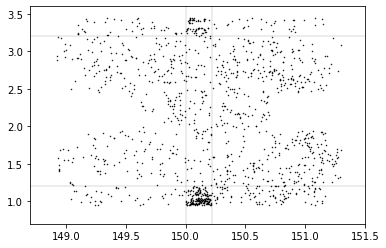

In [55]:
pl.plot(unmatched['RA'], unmatched['DEC'], marker='.', lw=0.0, c='k', markersize=1)

pl.axhline(3.20, c='k', lw=0.15)
pl.axhline(1.20, c='k', lw=0.15)

pl.axvline(150.00, c='k', lw=0.15)
pl.axvline(150.22, c='k', lw=0.15)

pl.xlim(148.7, 151.5)
pl.ylim(0.7, 3.6)

# Improve Arjun's gold mask with these areas.

In [57]:
exclude = (unmatched['RA'] >= 150.) & (unmatched['RA'] <= 150.22)  & ((unmatched['DEC'] >= 3.20) | (unmatched['DEC'] <= 1.20))

(0.7, 3.6)

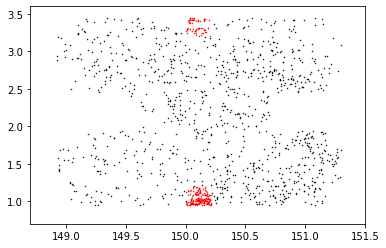

In [60]:
pl.plot(unmatched['RA'][~exclude], unmatched['DEC'][~exclude], marker='.', lw=0.0, c='k', markersize=1)
pl.plot(unmatched['RA'][exclude], unmatched['DEC'][exclude], marker='.', lw=0.0, c='r', markersize=1)

pl.xlim(148.7, 151.5)
pl.ylim(0.7, 3.6)

In [61]:
gold_unmatched = unmatched[~exclude]

In [62]:
gold_unmatched.pprint()

        RA                DEC         PMRA PMDEC ... g_err   r    r_err photo_z
------------------ ------------------ ---- ----- ... ----- ------ ----- -------
149.49003311510504  2.886386126934052  0.0   0.0 ... 0.025 24.364 0.024  2.6515
149.58499252303005  2.905580018805254  0.0   0.0 ... 0.059 24.348 0.078  2.6343
149.46428934202595  2.963162783280336  0.0   0.0 ...  0.02 23.898 0.021  2.4398
149.41958139189106  2.975295456600858  0.0   0.0 ... 0.035 24.265 0.021  3.2749
149.52021738082092  3.035012526635601  0.0   0.0 ... 0.059  23.91 0.057   2.587
149.47917936676606  3.083381329510472  0.0   0.0 ... 0.043 24.159 0.034  2.7336
 149.4711317423651 3.1069906407381382  0.0   0.0 ... 0.027  24.41 0.025  2.3991
 149.5885654741218 3.1894108635820544  0.0   0.0 ... 0.004 23.032 0.006  2.3821
149.43375156421408 3.2065121804694163  0.0   0.0 ... 0.028 24.284 0.027  2.5704
 149.5505713223367   3.27218572105432  0.0   0.0 ...  0.04 24.458 0.033  2.8536
               ...                ...  .

(array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  3.,  1.,  0.,  1.,  1.,  4.,  3.,
         3.,  6.,  8.,  8.,  9.,  4., 12.,  6., 12., 19., 16., 28., 29.,
        34., 35., 32., 47., 44., 47., 40., 48., 42., 38., 32., 33., 30.,
        11., 29., 15., 15., 12., 12.,  7., 11.]),
 array([17. , 17.1, 17.2, 17.3, 17.4, 17.5, 17.6, 17.7, 17.8, 17.9, 18. ,
        18.1, 18.2, 18.3, 18.4, 18.5, 18.6, 18.7, 18.8, 18.9, 19. , 19.1,
        19.2, 19.3, 19.4, 19.5, 19.6, 19.7, 19.8, 19.9, 20. , 20.1, 20.2,
        20.3, 20.4, 20.5, 20.6, 20.7, 20.8, 20.9, 21. , 21.1, 21.2, 21.3,
        21.4, 21.5, 21.6, 21.7, 21.8, 21.9, 22. , 22.1, 22.2, 22.3, 22.4,
        22.5, 22.6, 22.7, 22.8, 22.9, 23. , 23.1, 23.2, 23.3, 23.4, 2

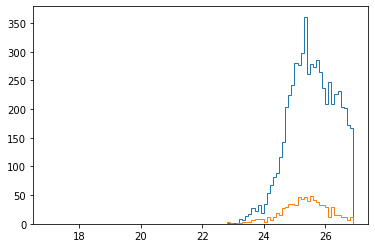

In [66]:
pl.hist(matched['u'], bins=np.arange(17., 27., 0.1), histtype='step')
pl.hist(gold_unmatched['u'], bins=np.arange(17., 27., 0.1), histtype='step')

(-0.1, 6.5)

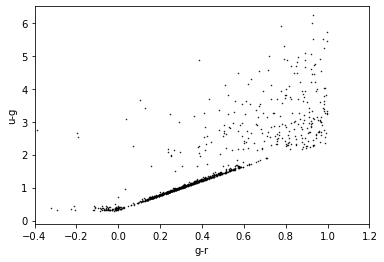

In [74]:
pl.plot(gold_unmatched['g'] - gold_unmatched['r'], gold_unmatched['u'] - gold_unmatched['g'], marker='.', lw=0.0, c='k', markersize=1)

pl.xlabel('g-r')
pl.ylabel('u-g')

pl.xlim(-0.4, 1.2)
pl.ylim(-0.1, 6.5)

# Christophe has changed the TOMOG color cuts.

In [ ]:
# New yeche selection:
# color_box = (u_g>0.9) & (g_r<1.0) & (u_g>1.6*g_r+0.75)
# color_box_ext = (u_g>0.3) & (u_g<2.0)  &  (u_g>2.2*g_r+0.32) & ~color_box
# r_range = (r>22.5) & (r<24.5) & quality & (g_r>-0.5) # r ref

# Currently in tmg:
# color_box       = (umg>0.9) & (gmr<1.2) & (umg>1.5*gmr+0.75)  
# color_box_ext_1 = (umg>0.4) & (umg<1.0) & (umg>2.4*gmr+0.3) & (gmr<0.15) & ~color_box
# color_box_ext_2 = (umg>0.7) & (umg<1.5) & (umg>2.4*gmr+0.3) & ~color_box & ~color_box_ext_1
# r_range         = (clauds['r']>22.5) & (clauds['r']<24.5) & quality & (gmr>-0.5)

In [72]:
gold_unmatched_nottomog = gold_unmatched[~tomog(gold_unmatched)]

Text(0, 0.5, 'u-g')

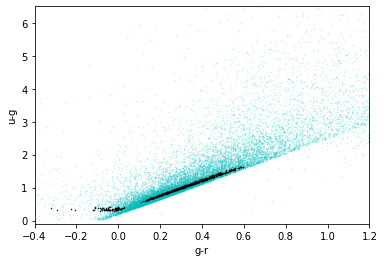

In [83]:
pl.plot(bxu['g'] - bxu['r'], bxu['u'] - bxu['g'], marker='.', lw=0.0, c='c', markersize=1, alpha=0.2)
pl.plot(gold_unmatched_nottomog['g'] - gold_unmatched_nottomog['r'], gold_unmatched_nottomog['u'] - gold_unmatched_nottomog['g'], marker='.', lw=0.0, c='k', markersize=1)

pl.xlim(-0.4, 1.2)
pl.ylim(-0.1, 6.5)

pl.xlabel('g-r')
pl.ylabel('u-g')

In [84]:
sc_gold_unmatched_nottomog = SkyCoord(ra=gold_unmatched_nottomog['RA']*u.degree, dec=gold_unmatched_nottomog['DEC']*u.degree)
sc_bxu                     = SkyCoord(ra=bxu['RA']*u.degree, dec=bxu['DEC']*u.degree)

# TMG is the larger catalog
idx, d2d, d3d              = sc_gold_unmatched_nottomog.match_to_catalog_sky(sc_bxu)

In [88]:
100. * (1. - np.mean(d2d.arcsecond < 0.1))

2.010050251256279

In [89]:
np.count_nonzero(d2d.arcsecond > 1.0)

12

# All but 12 are in the BXU cuts.

In [90]:
gold_unmatched_nottomog_notbxu = gold_unmatched_nottomog[d2d.arcsecond > 1.0]

In [93]:
gold_unmatched_nottomog_notbxu.pprint(max_width=-1)

        RA                DEC         PMRA PMDEC REF_EPOCH OVERRIDE         u                 u_err           g    g_err   r    r_err photo_z
------------------ ------------------ ---- ----- --------- -------- ------------------ -------------------- ------ ----- ------ ----- -------
  150.818563367432 3.4182482460826003  0.0   0.0       0.0    False             26.012                 0.31 24.519 0.118 24.002   0.1  2.6003
 150.3951754986852  1.345590123234402  0.0   0.0       0.0    False 24.587146154847108  0.11598814468393683 24.267 0.129 24.307 0.216  1.5304
150.07150707654475 1.2023216968432242  0.0   0.0       0.0    False  25.59174892245349  0.08389496235203497 24.587 0.019 24.277 0.027  2.2264
149.61507802340336 0.9509331027073032  0.0   0.0       0.0    False  26.48134478507761  0.24597523473960337 24.902 0.033 24.343 0.027  2.8938
 149.4440592772924 1.5279872681170383  0.0   0.0       0.0    False 26.065568771664502  0.16935929931848226 24.522 0.045 23.966 0.041  2.7942
150.69

(0.7, 3.6)

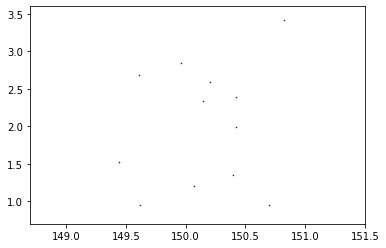

In [92]:
pl.plot(gold_unmatched_nottomog_notbxu['RA'], gold_unmatched_nottomog_notbxu['DEC'], marker='.', lw=0.0, c='k', markersize=1)

pl.xlim(148.7, 151.5)
pl.ylim(0.7, 3.6)

(array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   1.,   4.,
          5.,   5.,  11.,  14.,  24.,  31.,  26.,  33.,  25.,  36.,  62.,
         72., 101., 104., 125., 164., 205., 229., 271., 294., 325., 313.,
        369., 300., 308., 320., 316., 281., 259., 274., 286., 252., 256.,
        278., 291., 271., 278., 254.]),
 array([22. , 22.1, 22.2, 22.3, 22.4, 22.5, 22.6, 22.7, 22.8, 22.9, 23. ,
        23.1, 23.2, 23.3, 23.4, 23.5, 23.6, 23.7, 23.8, 23.9, 24. , 24.1,
        24.2, 24.3, 24.4, 24.5, 24.6, 24.7, 24.8, 24.9, 25. , 25.1, 25.2,
        25.3, 25.4, 25.5, 25.6, 25.7, 25.8, 25.9, 26. , 26.1, 26.2, 26.3,
        26.4, 26.5, 26.6, 26.7, 26.8, 26.9]),
 <a list of 1 Patch objects>)

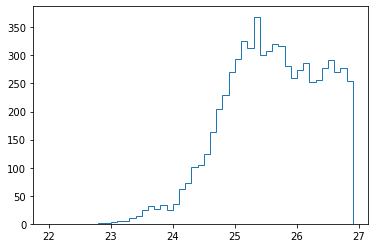

In [96]:
pl.hist(tmg['u'], bins=np.arange(22.0, 27., 0.1), histtype='step')

# Done.